In [1]:
!pip install astropy
!pip install sep

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### additional setup for tutorial

In [17]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Ellipse
import astropy.io.fits
%matplotlib inline


### read data into notebook

In [18]:
data = fits.getdata("image (2).fits")
rcParams['figure.figsize']=[10.,8.]

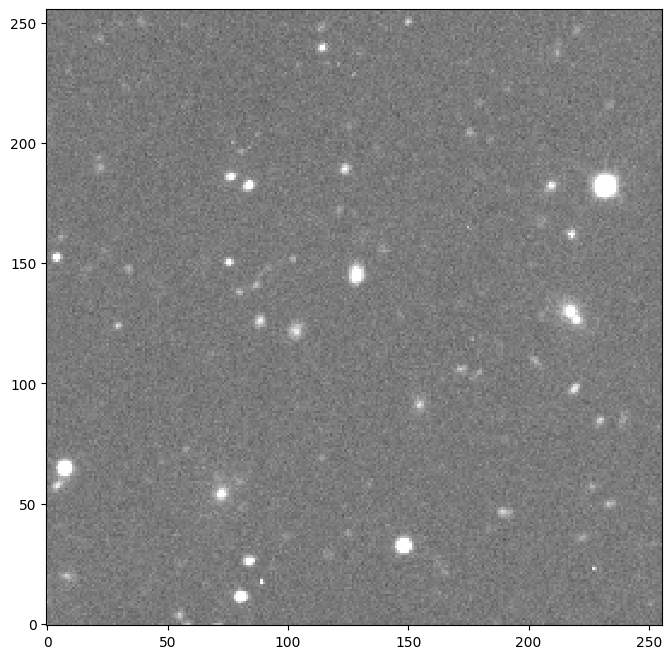

In [24]:
m,s = np.mean(data),np.std(data)

plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.savefig('MayaGonzalesgraymap.png', dpi=600, bbox_inches='tight')

### read an example image from a FITS file and displayed it in gray scale

### Background Subtraction

In [22]:
bkg = sep.Background(data)

print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


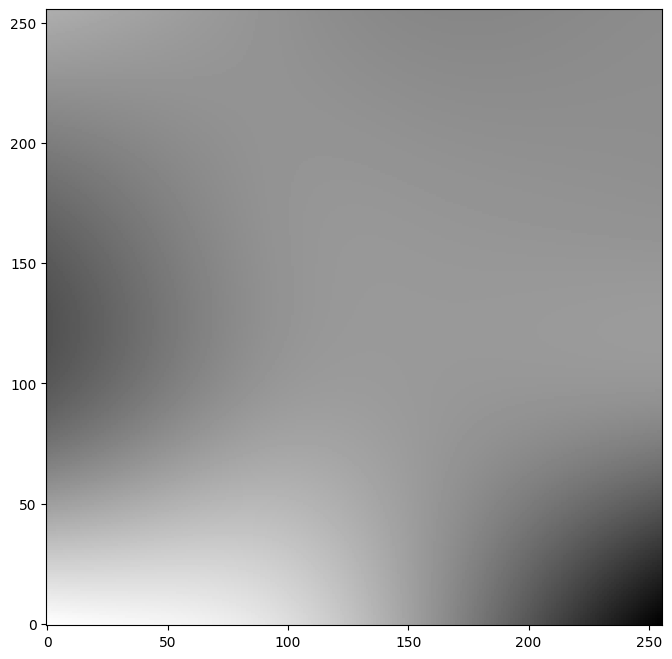

In [31]:
bkgrms=bkg.rms()
plt.imshow(bkgrms, interpolation='nearest', cmap='gray', origin='lower')
plt.savefig('mayagonzalesbkgrms.png', dpi=600, bbox_inches='tight')

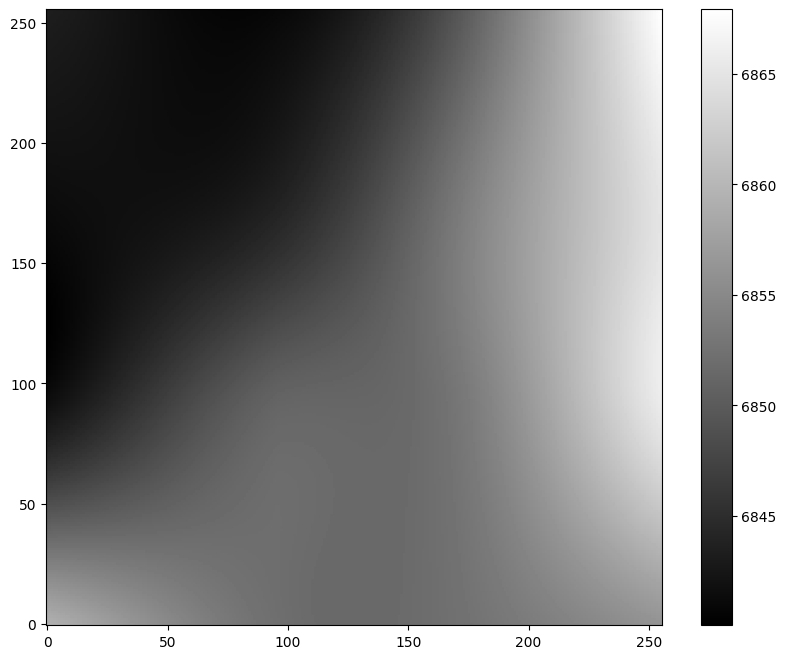

In [23]:
bkg_image = bkg.back()
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('mayagonzalesblkimage.png', dpi=600, bbox_inches='tight')

In [25]:
# subtract the background
data_sub = data - bkg

### Object Detection

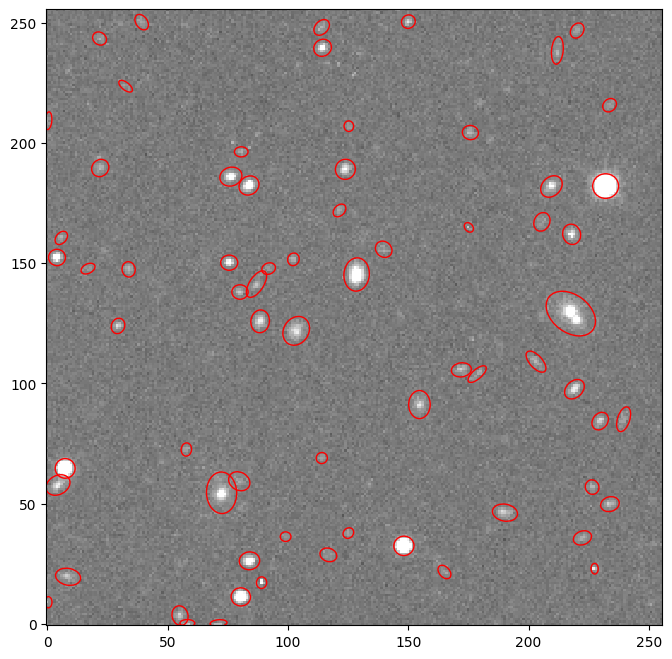

In [28]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

# how many objects were detected
len(objects)

from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
    
    
plt.savefig('mayagonzalescircleddata.png', dpi=600, bbox_inches='tight')

In [29]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

### Aperture photometry

In [30]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138
